In [7]:
#library(treeio)
#library(ggtree)
library(ape)
library("phangorn")
library(phytools)
#library(plotrix)
#library(tidytree)
library(dplyr)
library(tidyverse)


Attaching package: ‘dplyr’


The following object is masked from ‘package:ape’:

    where


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.4     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::map()    masks maps::map()
✖ dplyr::where()  masks ape::where()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


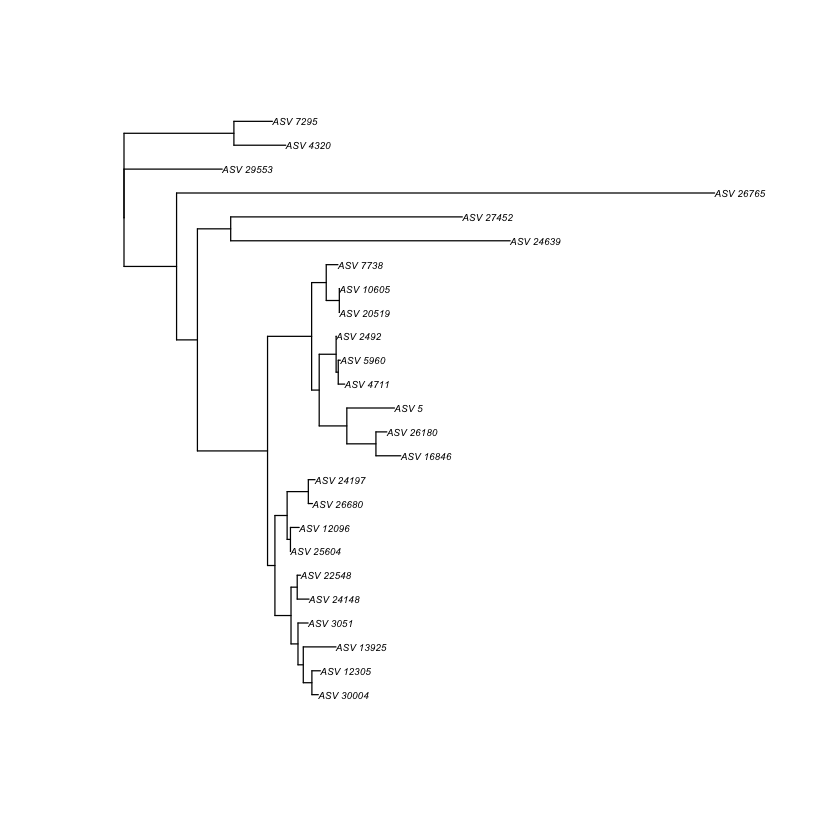

In [16]:
target <- "ASV_5"

#tree <- phytools::read.newick('rosales/gtdbtk.bac12016BINS.classify.tree')
tree <- phytools::read.newick('/Users/stephanie.rosales/Desktop/POR_fitgtr_tree.nwk')
inds <- which(tree$tip.label %in% target)

ans <- NULL
depth_nodes <- 10
max_sisters <- 10
for(x in inds) {
  now <- x
  temp <- NULL
  temp1 <- NULL
  for(y in 1:depth_nodes) {
    temp <- Descendants(tree,Siblings(tree,now)[[1]])[[1]]
    temp <- temp[!temp %in% c(temp1,inds)]
    temp <- sample(temp, min(length(temp), max_sisters))
    temp1 <- c(temp,temp1)
    now <- Ancestors(tree,now,'parent')
  }
  ans <- unique(c(ans,temp1))
}

newtree <- keep.tip(tree,c(ans,inds))
plot(ladderize(newtree),cex=0.5)
